# PWM maker

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following objects are maske

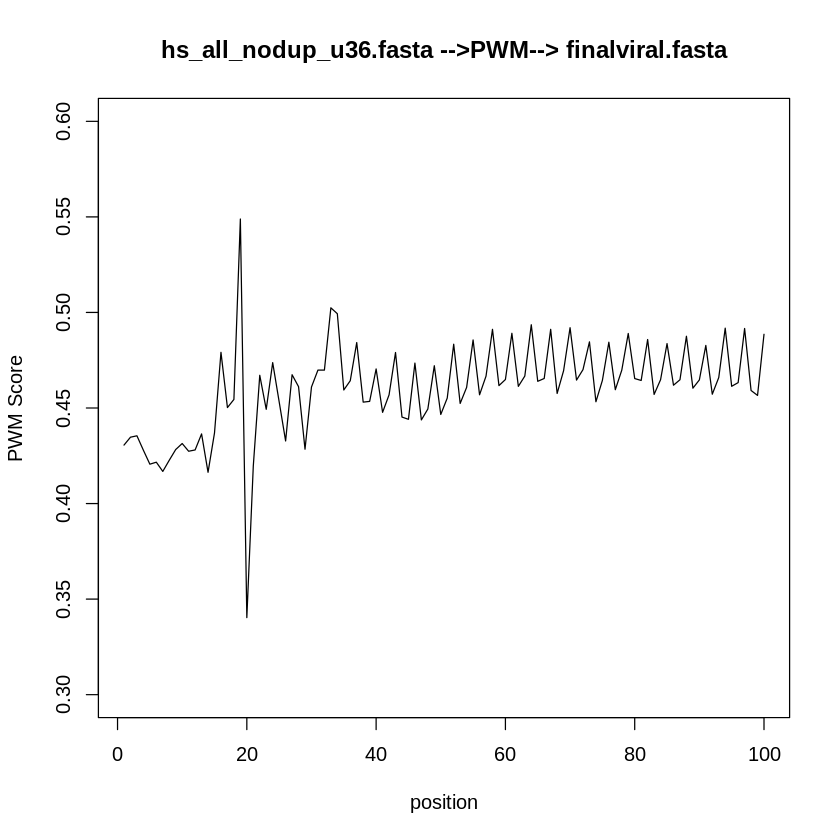

In [1]:
# Our next step is to score translation start sites by translation initiation mechanism.
#
# Attached is a sample code that does similar thing but not exactly.
#Here are the things you should do in your codes:
# 1. Collect all coding sequences with a bit of 5'UTRs, say 30 bps upstream from ATG.
# 2. Use viral genes that use scanning mechanism to build a PWM by R's Biostrings package
#   (google for documentation, there is only one site)
# 3. Score a sequence by scanning from 5' to 3', including 5'utr & coding region (ORF).
#  It should produce a score profile where y-axis is the score, x-axis is position.
#
# In theory, viral genes using scanning mechanism should
# show a peak at the annotated translation start site.
#  Whereas, viral genes using other mechanisms should not show a peak. Fingers crossed!

library(Biostrings)
#library(matrixStats)

# virus = readDNAStringSet('annotated_extracted_TIS_viral_30upstream_.CDS.TIS.fasta')
# virus.kozak = DNAStringSet(virus)
# virus.cons   = consensusString(virus.kozak)
# virus.pwm    = PWM(virus.kozak, type = 'log2probratio')

human.filename = "hs_all_nodup_u36.fasta"
query.filename = "finalviral.fasta"


#make a pwm of size 13
human = readDNAStringSet(human.filename)
human.kozak = DNAStringSet(subseq(human, start = 22, end= 34))
human.pwm    = PWM(human.kozak, type = 'log2probratio')

query = readDNAStringSet(query.filename)

#print(PWMscoreStartingAt(human.pwm, query[[1]], starting.at = 99))

#smallest.sequence <- min(query@ranges@width)-13

#loop through ever single element
pwm.scores = NULL

size.select = 120

for (i in 1:length(query)) {
  #atg.codon.subseq <- subseq(query[i], start = 31, end = 33)
  
  if(query@ranges@width[i] > size.select){
    #if (grepl("Scanning", query@ranges@NAMES[i]) == TRUE) {
    
  score <- PWMscoreStartingAt(human.pwm, query[[i]], starting.at = 1:100)
  
    #longest length the score can do is 168 b/c that is the shortest sequence
  pwm.scores = cbind(pwm.scores, score)
  }
  
}

pwm.score.means = rowMeans(pwm.scores)

# means <- rowMeans(pwm.scores)
# stds <- rowSds(pwm.scores)


plot(
  pwm.score.means,
  type = "l",
  xlab = "position",
  ylab = "PWM Score",
  ylim = c(0.3,0.6),
  main =  paste(human.filename, "-->PWM-->", query.filename)
)



# write.csv(pwm.score.means, paste(human.filename, "-->PWM-->", query.filename))

# data1 <- read.csv("rna30upstream_and_CDS.fasta -->PWM--> rna30upstream_and_CDS.fasta")
# data2 <- read.csv("rna30upstream_and_CDS.fasta -->PWM--> finalviral.fasta")

# df <- cbind(data1$x, data2$x)

# plot(data1$x, type = "l")
# lines(data2$x)

# plot(means, type = "l", ylim = c(0, 1))
# points(means + stds, type = "l")
# points(means - stds, type = "l")



#pick particular virus
#small group
#lower sample size
#12 sequences
#

#random sequences should expect steady state

#stddev near true ATG should be 0

#starndard devation per row




# ## Use human PWM to score viral seqs
# ## size of kozak sequence
# ## score only the beginning 336 bps (same as internal atg file)
# ksize = 13
# max.len = 336 - ksize + 1
# seqfiles = c('')
# outfiles = c('viral_orf_u36.tsv', 'viral_internal_atg.tsv')
# #seqfiles = c('viral_test.fasta','test_internal.fasta')
# #outfiles = c('viral_test.tsv','test_internal.tsv')
#
#
# for (idx in 1:length(seqfiles)) {
#   fname = seqfiles[idx]
#   print(fname)
#
#   virus = readDNAStringSet(fname)
#   all.scores = c()
#   all.scores.rownames = c()
#
#   for (i in 1:length(virus)) {
#     s.name = names(virus[i])
#     print(s.name)
#     s = virus[[i]]
#
#     if ((length(s) - ksize + 1) >= max.len) {
#       all.scores.rownames = c(all.scores.rownames, names(virus[i]))
#
#       s.scores = c()
#
#       for (st in 1:max.len) {
#         score = PWMscoreStartingAt(hs.pwm, s[st:(st + ksize - 1)])
#         s.scores = c(s.scores, score)
#       }
#
#       all.scores = rbind(all.scores, s.scores)
#     }
#   }
#   pos.names = c(seq(-27,-1, 1), seq(1, 297, 1))
#   colnames(all.scores) = pos.names
#   rownames(all.scores) = all.scores.rownames
#   write.table(all.scores,
#               file = outfiles[idx],
#               col.names = T,
#               sep = '\t')
# }
#
#
# ## Plot graphs
# real = read.table(outfiles[1], head = T, sep = '\t')
# internal = read.table(outfiles[2], head = T, sep = '\t')
# plot(
#   colMeans(real),
#   xlab = 'Position from ATG',
#   ylim = c(0, 1),
#   ylab = 'PWM scores',
#   type = 'l',
#   axes = F
# )
# pos.names = c(seq(-27,-1, 10), seq(1, 297, 10))
# axis(side = 1, at = pos.names)
# axis(side = 2, at = seq(0, 1, 0.1))
# #lines(colMeans(internal),col='blue')

In [2]:
# read in the TIS efficiencies TIS

        

TIS.eff <- read.csv(file = "mono_vectorized_TIS_seq.csv")



In [3]:
#remaking the model from the paper as SINGLE NUCLEOTIDE MODEL


#TIS.eff from supplement

library(Biostrings)

# U = TIS.eff$U
# C = TIS.eff$C
# A = TIS.eff$A
# G = TIS.eff$G

#because the model knows it already has U and C and A, it already knows what G will be



#summary(lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff))

#does a model on all the TIS eff variables and the efficiency

model = lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff)



#we can solve for the NA coefficients because their independent of each other
model$coefficients[5]    = log(4-sum(exp(model$coefficients[2 :4])))
model$coefficients[9]    = log(4-sum(exp(model$coefficients[6 :8])))
model$coefficients[13]   = log(4-sum(exp(model$coefficients[10:12])))
model$coefficients[17]   = log(4-sum(exp(model$coefficients[14:16])))
model$coefficients[21]   = log(4-sum(exp(model$coefficients[18:20])))
model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))
model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))
model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))


#exp(model$coefficients[2:33])

model


pwm_dataframe = data.frame(exp(model$coefficients[2:5]),
exp(model$coefficients[6:9]),
exp(model$coefficients[10:13]),
exp(model$coefficients[14:17]),
exp(model$coefficients[18:21]),
exp(model$coefficients[22:25]),
exp(model$coefficients[26:29]),
exp(model$coefficients[30:33]))

pwm_dataframe

test = data.matrix(pwm_dataframe)



test[1]


PWMscoreStartingAt(test)
typeof(test)


#UCAG --> U.7, C.7, A.7, G.7


# lm(y~ ., data = TIS.eff[1])
#vector associated with efficienes  = 


#convert sequences to the 1/0 vector of size 8


#8 positions 4 ucleotides = 32 coefficients


#multiple regression







Call:
lm(formula = log(TIS.eff$efficiency) ~ ., data = TIS.eff)

Coefficients:
(Intercept)            U            C            A            G          U.1  
   4.388165    -0.065892    -0.085285    -0.043654     0.172467     0.057338  
        C.1          A.1          G.1          U.2          C.2          A.2  
   0.050473    -0.043654    -0.070494    -0.032937     0.121419     0.095178  
        G.2          U.3          C.3          A.3          G.3          U.4  
  -0.218845    -0.493818    -0.221631     0.065332     0.419357     0.112668  
        C.4          A.4          G.4          U.5          C.5          A.5  
   0.201881     0.176546    -0.767984    -0.126889    -0.024267     0.054785  
        G.5          U.6          C.6          A.6          G.6          U.7  
   0.083265     0.018115    -0.135487    -0.051793     0.147475    -0.062730  
        C.7          A.7          G.7  
   0.081025     0.006035    -0.030097  


,exp.model.coefficients.2.5..,exp.model.coefficients.6.9..,exp.model.coefficients.10.13..,exp.model.coefficients.14.17..,exp.model.coefficients.18.21..,exp.model.coefficients.22.25..,exp.model.coefficients.26.29..,exp.model.coefficients.30.33..
U,0.9362317,1.0590132,0.9675999,0.6102920,1.1192606,0.8808314,1.0182805,0.9391968
C,0.9182507,1.0517687,1.1290984,0.8012111,1.2237028,0.9760255,0.8732903,1.0843981
A,0.9572854,0.9572847,1.0998551,1.0675139,1.1930891,1.0563135,0.9495250,1.0060535
G,1.1882321,0.9319334,0.8034466,1.5209830,0.4639476,1.0868295,1.1589042,0.9703516


[1] 0.9362317

ERROR: Error in .normargPwm(pwm): 'rownames(pwm)' must be the 4 DNA bases ('DNA_BASES')


In [35]:
#dinucleotide model

# read in the TIS efficiencies TIS

        

#diNT.IS.eff from supplement which is converted into all possibilities of dinucleotides

# library(Biostrings)


#summary(lm(log(TIS.eff$efficiency) ~ ., data = TIS.eff))

#does a model on all the TIS eff variables and the efficiency



diNT.TIS.eff <- read.csv(file = "dint_vectorized_TIS_seq.csv")


#this will give you 
#lnK + summation coefficients
model = lm(log(diNT.TIS.eff$efficiency) ~ ., data = diNT.TIS.eff)


model




Call:
lm(formula = log(diNT.TIS.eff$efficiency) ~ ., data = diNT.TIS.eff)

Coefficients:
(Intercept)           UU           UC           UA           UG           CU  
   4.602730     0.038484     0.078349    -0.074545    -0.067355     0.033257  
         CC           CA           CG           AU           AC           AA  
   0.029126    -0.078724    -0.086295     0.071191     0.085534    -0.073328  
         AG           GU           GC           GA           GG         UU.1  
  -0.019510     0.080573     0.123865     0.034064           NA    -0.039903  
       UC.1         UA.1         UG.1         CU.1         CC.1         CA.1  
   0.035939     0.051937           NA    -0.087463    -0.024215     0.038824  
       CG.1         AU.1         AC.1         AA.1         AG.1         GU.1  
         NA    -0.036777     0.047912     0.048907           NA     0.015713  
       GC.1         GA.1         GG.1         UU.2         UC.2         UA.2  
   0.078473     0.121102           NA    

In [50]:

diNT.df= data.frame(exp(model$coefficients[2:17]),
exp(model$coefficients[18:33]),
exp(model$coefficients[34:49]),
exp(model$coefficients[50:65]),
exp(model$coefficients[66:81]),
exp(model$coefficients[82:97]),
exp(model$coefficients[98:113]))

diNT.df

,exp.model.coefficients.2.17..,exp.model.coefficients.18.33..,exp.model.coefficients.34.49..,exp.model.coefficients.50.65..,exp.model.coefficients.66.81..,exp.model.coefficients.82.97..,exp.model.coefficients.98.113..
UU,1.0392336,0.9608830,0.4339322,1.236744,0.8672492,0.8740536,1.0828136
UC,1.0815002,1.0365923,0.6692175,1.650639,1.0362544,0.7200765,1.0236186
UA,0.9281661,1.0533096,1.0986912,1.514967,1.0519155,0.7819388,1.1133603
UG,0.9348633,NA,NA,NA,NA,NA,NA
CU,1.0338159,0.9162531,0.5421496,1.181081,0.9012441,0.8723726,1.0070143
CC,1.0295540,0.9760758,0.7378623,1.256724,0.9453652,0.7815031,0.9344800
CA,0.9242951,1.0395873,1.1103815,1.325281,1.0588176,0.8071519,1.2092942
CG,0.9173232,NA,NA,NA,NA,NA,NA
AU,1.0737859,0.9638913,0.5002520,1.017188,0.8446866,0.8332845,1.0139044
AC,1.0892991,1.0490785,0.7084507,1.030692,0.9255109,0.7490046,1.2269049


In [48]:
expmodel = exp(model$coefficients)





# exp(model$coefficients[18:33])

#       exp(model$coefficients[18:21])
# model$coefficients[21] = log(4-sum(exp(model$coefficients[18:20])))

#       exp(model$coefficients[22:25])
# model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))

#       exp(model$coefficients[26:29])
# model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))

#       exp(model$coefficients[30:33])
# model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))



# exp(model$coefficients[34:49])

#       exp(model$coefficients[34:37])
# model$coefficients[37] = log(4-sum(exp(model$coefficients[34:36])))

#       exp(model$coefficients[38:41])
# model$coefficients[41] = log(4-sum(exp(model$coefficients[38:40])))

#       exp(model$coefficients[42:45])
# model$coefficients[45] = log(4-sum(exp(model$coefficients[42:44])))

#       exp(model$coefficients[46:49])
# model$coefficients[49] = log(4-sum(exp(model$coefficients[46:48])))



# exp(model$coefficients[50:65])
#       exp(model$coefficients[50:53])
# model$coefficients[53] = log(4-sum(exp(model$coefficients[50:52])))

#       exp(model$coefficients[54:57])
# model$coefficients[57] = log(4-sum(exp(model$coefficients[54:56])))

#       exp(model$coefficients[58:61])
# model$coefficients[61] = log(4-sum(exp(model$coefficients[58:60])))

#       exp(model$coefficients[62:65])
# model$coefficients[65] = log(4-sum(exp(model$coefficients[62:64])))




# exp(model$coefficients[66:81])


#       exp(model$coefficients[66:69])
# model$coefficients[69] = log(4-sum(exp(model$coefficients[66:68])))

#       exp(model$coefficients[70:73])
# model$coefficients[73] = log(4-sum(exp(model$coefficients[70:72])))

#       exp(model$coefficients[74:77])
# model$coefficients[77] = log(4-sum(exp(model$coefficients[74:76])))

#       exp(model$coefficients[78:81])
# model$coefficients[81] = log(4-sum(exp(model$coefficients[78:80])))


# # exp(model$coefficients[82:97])
#       exp(model$coefficients[82:85])
# model$coefficients[85] = log(4-sum(exp(model$coefficients[82:84])))

#       exp(model$coefficients[86:89])
# model$coefficients[89] = log(4-sum(exp(model$coefficients[86:88])))

#       exp(model$coefficients[90:93])
# model$coefficients[93] = log(4-sum(exp(model$coefficients[90:92])))

#       exp(model$coefficients[94:97])
# model$coefficients[97] = log(4-sum(exp(model$coefficients[94:96])))
# exp(model$coefficients[18:33])



[1] 2
[1] 5
[1] 2
[1] 9
[1] 6
[1] 5
[1] 6
[1] 9
[1] 10
[1] 5
[1] 10
[1] 9


In [81]:
# model$coefficients

#first positions diNT



# model$coefficients

# 16-sum(exp(model$coefficients[2:16]))



#UNCOMMENT THIS WHEN DONE
# model$coefficients[2:17]
# model$coefficients[18:33]
# model$coefficients[34:49]
# model$coefficients[50:65]
# model$coefficients[66:81]
# model$coefficients[82:97]

# exp(model$coefficients[2:17])
# exp(model$coefficients[18:33])
# exp(model$coefficients[34:49])
# exp(model$coefficients[50:65])
# exp(model$coefficients[66:81])
# exp(model$coefficients[82:97])




# sum(exp(model$coefficients[2:17]))



# model$coefficients[17] = log(16-sum(exp(model$coefficients[2:16])))

# model$coefficients[2:17]




# exp(model$coefficients[18:33])

#       exp(model$coefficients[18:21])
# model$coefficients[21] = log(4-sum(exp(model$coefficients[18:20])))

#       exp(model$coefficients[22:25])
# model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))

#       exp(model$coefficients[26:29])
# model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))

#       exp(model$coefficients[30:33])
# model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))



# exp(model$coefficients[34:49])

#       exp(model$coefficients[34:37])
# model$coefficients[37] = log(4-sum(exp(model$coefficients[34:36])))

#       exp(model$coefficients[38:41])
# model$coefficients[41] = log(4-sum(exp(model$coefficients[38:40])))

#       exp(model$coefficients[42:45])
# model$coefficients[45] = log(4-sum(exp(model$coefficients[42:44])))

#       exp(model$coefficients[46:49])
# model$coefficients[49] = log(4-sum(exp(model$coefficients[46:48])))



exp(model$coefficients[50:65])



UHOH
      exp(model$coefficients[50:53])
model$coefficients[53] = log(4-sum(exp(model$coefficients[50:52])))

      exp(model$coefficients[54:57])
model$coefficients[57] = log(4-sum(exp(model$coefficients[54:56])))

      exp(model$coefficients[58:61])
model$coefficients[61] = log(4-sum(exp(model$coefficients[58:60])))

      exp(model$coefficients[62:65])
model$coefficients[65] = log(4-sum(exp(model$coefficients[62:64])))




# exp(model$coefficients[66:81])


#       exp(model$coefficients[66:69])
# model$coefficients[69] = log(4-sum(exp(model$coefficients[66:68])))

#       exp(model$coefficients[70:73])
# model$coefficients[73] = log(4-sum(exp(model$coefficients[70:72])))

#       exp(model$coefficients[74:77])
# model$coefficients[77] = log(4-sum(exp(model$coefficients[74:76])))

#       exp(model$coefficients[78:81])
# model$coefficients[81] = log(4-sum(exp(model$coefficients[78:80])))


# # exp(model$coefficients[82:97])
#       exp(model$coefficients[82:85])
# model$coefficients[85] = log(4-sum(exp(model$coefficients[82:84])))

#       exp(model$coefficients[86:89])
# model$coefficients[89] = log(4-sum(exp(model$coefficients[86:88])))

#       exp(model$coefficients[90:93])
# model$coefficients[93] = log(4-sum(exp(model$coefficients[90:92])))

#       exp(model$coefficients[94:97])
# model$coefficients[97] = log(4-sum(exp(model$coefficients[94:96])))




# model$coefficients[5]    = log(16-sum(exp(model$coefficients[2 :4])))
# model$coefficients[9]    = log(4-sum(exp(model$coefficients[6 :8])))
# model$coefficients[13]   = log(4-sum(exp(model$coefficients[10:12])))
# model$coefficients[17]   = log(4-sum(exp(model$coefficients[14:16])))
# model$coefficients[21]   = log(4-sum(exp(model$coefficients[18:20])))
# model$coefficients[25]   = log(4-sum(exp(model$coefficients[22:24])))
# model$coefficients[29]   = log(4-sum(exp(model$coefficients[26:28])))
# model$coefficients[33]   = log(4-sum(exp(model$coefficients[30:32])))


# #exp(model$coefficients[2:33])

# model


# pwm_dataframe = data.frame(exp(model$coefficients[2:5]),
# exp(model$coefficients[6:9]),
# exp(model$coefficients[10:13]),
# exp(model$coefficients[14:17]),
# exp(model$coefficients[18:21]),
# exp(model$coefficients[22:25]),
# exp(model$coefficients[26:29]),
# exp(model$coefficients[30:33]))


UU.4      UC.4      UA.4      UG.4 
0.8672492 1.0362544 1.0519155 1.0445810

CU.4      CC.4      CA.4      CG.4 
0.9012441 0.9453652 1.0588176 1.0945731

AU.4      AC.4      AA.4      AG.4 
0.8446866 0.9255109 1.0592632 1.1705392

GU.4      GC.4      GA.4      GG.4 
0.9187128 0.9019639 1.0870707 1.0922526

[1] 4

UU.5      UC.5      UA.5      UG.5 
1.0416034 0.8409022 0.9408876 1.1766067

CU.5      CC.5      CA.5      CG.5 
1.0396002 0.9126359 0.9712259 1.0765381

AU.5      AC.5      AA.5      AG.5 
0.9930191 0.8746843 0.9280576 1.2042389

GU.5      GC.5      GA.5      GG.5 
0.9998696 0.8664435 0.9585010 1.1751859

[1] 16

In [62]:
library(Biostrings)

# diNT.df= data.frame(exp(model$coefficients[2:17]),
# exp(model$coefficients[18:33]),
# exp(model$coefficients[34:49]),
# exp(model$coefficients[50:65]),
# exp(model$coefficients[66:81]),
# exp(model$coefficients[82:97]))

# diNT.df

diNT.csv = read.csv('diNTPWM.csv')

vectorized.diNT = as.vector(diNT.csv)

diNT.pwm = PWM(vectorized.diNT, type = 'log2probratio')


[1] "list"

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘PWM’ for signature ‘"data.frame"’


In [8]:
diNT.TIS.eff.alskdjflasdjlfas <- read.csv(file = "dint_vectorized_TIS_seq.csv")


#this will give you 
#lnK + summation coefficients
testsetastastfdasdfmodel = lm(log(diNT.TIS.eff.alskdjflasdjlfas$efficiency) ~ ., data = diNT.TIS.eff.alskdjflasdjlfas)


testsetastastfdasdfmodel




Call:
lm(formula = log(diNT.TIS.eff.alskdjflasdjlfas$efficiency) ~ 
    ., data = diNT.TIS.eff.alskdjflasdjlfas)

Coefficients:
(Intercept)           UU           UC           UA           UG           CU  
   4.602730     0.038484     0.078349    -0.074545    -0.067355     0.033257  
         CC           CA           CG           AU           AC           AA  
   0.029126    -0.078724    -0.086295     0.071191     0.085534    -0.073328  
         AG           GU           GC           GA           GG         UU.1  
  -0.019510     0.080573     0.123865     0.034064           NA    -0.039903  
       UC.1         UA.1         UG.1         CU.1         CC.1         CA.1  
   0.035939     0.051937           NA    -0.087463    -0.024215     0.038824  
       CG.1         AU.1         AC.1         AA.1         AG.1         GU.1  
         NA    -0.036777     0.047912     0.048907           NA     0.015713  
       GC.1         GA.1         GG.1         UU.2         UC.2         UA.2  
  

# complete predicted TIS eff

In [2]:
predicted.TIS.eff <- read.csv(file = "mono_and_di_interactions.csv")

In [ ]:
predicted.TIS.model  = lm(log(predicted.TIS.eff$effciency) ~., data = predicted.TIS.eff)
predicted.TIS.model

In [8]:
exp(testsetastastfdasdfmodel$coefficients)



(Intercept)          UU          UC          UA          UG          CU 
 99.7562836   1.0392336   1.0815002   0.9281661   0.9348633   1.0338159 
         CC          CA          CG          AU          AC          AA 
  1.0295540   0.9242951   0.9173232   1.0737859   1.0892991   0.9292963 
         AG          GU          GC          GA          GG        UU.1 
  0.9806788   1.0839084   1.1318629   1.0346506          NA   0.9608830 
       UC.1        UA.1        UG.1        CU.1        CC.1        CA.1 
  1.0365923   1.0533096          NA   0.9162531   0.9760758   1.0395873 
       CG.1        AU.1        AC.1        AA.1        AG.1        GU.1 
         NA   0.9638913   1.0490785   1.0501222          NA   1.0158367 
       GC.1        GA.1        GG.1        UU.2        UC.2        UA.2 
  1.0816340   1.1287405          NA   0.4339322   0.6692175   1.0986912 
       UG.2        CU.2        CC.2        CA.2        CG.2        AU.2 
         NA   0.5421496   0.7378623   1.1103815          NA   0.5002520 
       AC.2        AA.2        AG.2        GU.2        GC.2        GA.2 
  0.7084507   0.9981869          NA   0.4262202   0.6696634   1.0993321 
       GG.2        UU.3        UC.3        UA.3        UG.3        CU.3 
         NA   1.2367437   1.6506392   1.5149674          NA   1.1810811 
       CC.3        CA.3        CG.3        AU.3        AC.3        AA.3 
  1.2567240   1.3252806          NA   1.0171878   1.0306920   1.0347223 
       AG.3        GU.3        GC.3        GA.3        GG.3        UU.4 
         NA   1.0064677   1.0472401   1.0609679          NA   0.8672492 
       UC.4        UA.4        UG.4        CU.4        CC.4        CA.4 
  1.0362544   1.0519155          NA   0.9012441   0.9453652   1.0588176 
       CG.4        AU.4        AC.4        AA.4        AG.4        GU.4 
         NA   0.8446866   0.9255109   1.0592632          NA   0.9187128 
       GC.4        GA.4        GG.4        UU.5        UC.5        UA.5 
  0.9019639   1.0870707          NA   0.8740536   0.7200765   0.7819388 
       UG.5        CU.5        CC.5        CA.5        CG.5        AU.5 
         NA   0.8723726   0.7815031   0.8071519          NA   0.8332845 
       AC.5        AA.5        AG.5        GU.5        GC.5        GA.5 
  0.7490046   0.7712762          NA   0.8390330   0.7419479   0.7965767 
       GG.5        UU.6        UC.6        UA.6        UG.6        CU.6 
         NA   1.0828136   1.0236186   1.1133603          NA   1.0070143 
       CC.6        CA.6        CG.6        AU.6        AC.6        AA.6 
  0.9344800   1.2092942          NA   1.0139044   1.2269049   1.0311511 
       AG.6        GU.6        GC.6        GA.6        GG.6 
         NA   0.7037850   1.1782457   0.7378947          NA